# Naive Bayes

## Introduction and Formulation

A Naive Bayes algorithm is a **supervised** learning method used for **Classification** by applying the **Bayes Theorem** with the "naive" assumption of conditional independence between every pair of features given the value of the class variable. 

<figure>
    <center><img src="img/NB.png" width="500" height="300">
    <figcaption>Fig: Naive Bayes</figcaption></center>
</figure>

That is 
$$
P(y | x_1 , \dots x_n) = \frac{P(y)P(x_1 , \dots , x_n | y)}{P(x_1 , \dots x_n)} = \frac{P(y)\prod_{i=1}^n  P(x_i | y)}{P(x_1 , \dots x_n)} \propto P(y)\prod_{i=1}^n  P(x_i | y)
$$
And the prediction is obtained by 
$$
\hat{y} = \argmax_{y} P(y)\prod_{i=1}^n  P(x_i | y)
$$
The different types of Naive Bayes algorithms differ mainly by the assumptions they make regarding the distribution of $P(x_i | y)$

### Gaussian Naive Bayes
Naive Bayes algorithm such that $x_i | y \sim \mathcal{N}(\mu_y , \sigma_y^2)$  , i.e
$$
P(x_i | y) = \frac{1}{\sqrt{2\pi\sigma_y^2}}\exp \left(- \frac{(x_i - \mu_y)^2}{2\sigma_y^2} \right )
$$
Where $\mu_y$ and $\sigma_y$ are estimated using maximum likelihood. 

Works well with **numerical type** of data. 

### Multinomial Naive Bayes
Naive Bayes algorithm such that $x_i | y$ follows a multinomial distribution
$$
P(x_i | y) = \frac{N_{y_i} + \alpha}{N_y + \alpha}  
$$
Where $N_{y_i}$ is the number of times feature $i$ appears in the sample $y$ in the training set and $N_y = \sum_i N_{y_i}$. $\alpha$ is the **smoothing prior** if $\alpha=1$ it's called *laplace* smoothing and if $\alpha < 1$ it's called *Lidstone* smoothing. 

Works well with **Categorical type** of data. 


## Important Parameters

 - **priors**: $P(y)$, Default: According to data
 - $\alpha$: For calculation stability  Default: 1e-9

## Relevant Information 
 - Numerical data can be discretize in order to use a Multinomial Naive Bayes. 
 - Naive Bayes is **not sensitive to feature scaling**
 - Approx Complexity: $O(M \cdot N)$ where $N$ number of attributes and $M$ the number of instances. 
 - Naive Bayes is known as a decent classifier (it doesn't require too much training examples) but a bad estimator, so the probability outputs are not to be taken too seriously. 



## Implementation


We are going to work with the [Digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) Dataset


In [1]:
#Import usual libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#Import usual functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score

#Import utils
from utils.plot import confusion_matrix_custom

#Import required libraries and functions
from sklearn.datasets import load_digits, load_iris
from sklearn.naive_bayes import GaussianNB

In [2]:
#Load the dataset 
digits = load_digits()
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df["target"] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [3]:
#Divide the data 
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["target"]), df["target"], test_size=0.333, stratify = df["target"], random_state=666)
#Create the model
clf = GaussianNB()
#Fit the data
clf.fit(X_train,y_train)
#Make a prediction
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.67      0.87      0.76        61
           2       0.97      0.59      0.74        59
           3       0.85      0.84      0.84        61
           4       0.95      0.88      0.91        60
           5       0.89      0.93      0.91        61
           6       1.00      0.98      0.99        60
           7       0.74      0.98      0.84        60
           8       0.53      0.62      0.57        58
           9       0.90      0.60      0.72        60

    accuracy                           0.83       599
   macro avg       0.85      0.83      0.83       599
weighted avg       0.85      0.83      0.83       599



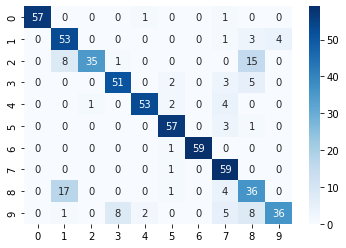

In [4]:
#Change of notation
y_real = y_test

#Showing performance with a confusion matrix
confusion_matrix_custom(y_real,y_pred)

#Showing performance with metrics
print(classification_report(y_real , y_pred))
